In [173]:
import numpy as np
import pandas as pd
import openpyxl 
import os

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


In [174]:
ccp = pd.read_excel('../CCP/data/all_in_one.xlsx', sheet_name='all_in_one')
ccp.head()

,CCP,quarter,clearning service,4.1.1,4.1.2,4.1.3,4.1.4,4.1.5,4.1.6,4.1.7,...,6.2.15.POST,18.1.1.1,18.1.1.2,18.1.2.2,19.1.1,19.1.2,23.1.2.OTC,23.1.2.ETD,23.2.1.OTC,23.2.1.ETD
0,KELER,Q2-2017,TEA,6.949029e+05,16188.040276,NaN,6.293910e+06,6.293910e+06,0.0,0.0,...,5.149808e+07,11.0,10.0,0.0,NaN,17.0,0.0,7.419962e+06,0.0,3.684394e+07
1,KELER,Q2-2017,KGA,7.488794e+05,16188.040276,NaN,6.782789e+06,6.782789e+06,0.0,0.0,...,7.216904e+07,8.0,4.0,0.0,1160.0,8.0,0.0,2.895278e+04,0.0,3.152465e+07
2,KELER,Q2-2017,TP KGA,3.588365e+05,16188.040276,NaN,3.250072e+06,3.250072e+06,0.0,0.0,...,1.760907e+07,0.0,35.0,0.0,NaN,0.0,0.0,0.000000e+00,0.0,0.000000e+00
3,KELER,Q2-2017,CEEGEX KGA,8.865016e+04,16188.040276,NaN,8.029268e+05,8.029268e+05,0.0,0.0,...,6.261182e+06,0.0,19.0,0.0,NaN,0.0,0.0,0.000000e+00,0.0,0.000000e+00
4,KELER,Q3-2016,TEA,1.119162e+06,16173.378619,2.264273e+06,1.118551e+07,1.118551e+07,0.0,0.0,...,4.685747e+07,11.0,12.0,0.0,NaN,17.0,NaN,NaN,NaN,NaN


In [175]:
#MISSING DATA PRESENTATION
total = ccp.isnull().sum().sort_values(ascending=False)
ratio = (ccp.isnull().sum() / ccp.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, ratio], axis=1, keys=['Total', 'Ratio'])
missing.head(20)

,Total,Ratio
4.1.3,140,0.412979
19.1.1,133,0.392330
4.1.2,120,0.353982
4.1.6,120,0.353982
23.1.2.ETD,96,0.283186
23.1.2.OTC,90,0.265487
4.1.10,90,0.265487
23.2.1.OTC,82,0.241888
23.2.1.ETD,77,0.227139
18.1.2.2,72,0.212389


Text(0.5, 1.0, 'Percent missing data by feature')

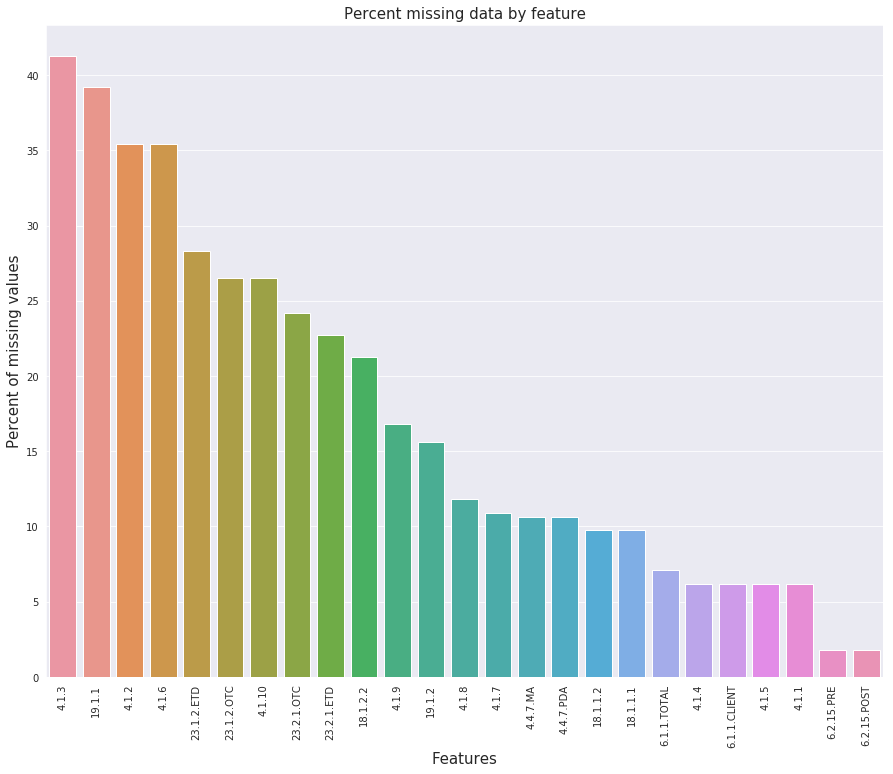

In [176]:
all_data_na = (ccp.isnull().sum() / len(ccp)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [177]:
ccp.dtypes

CCP                   object
quarter               object
clearning service     object
4.1.1                float64
4.1.2                float64
4.1.3                float64
4.1.4                float64
4.1.5                float64
4.1.6                float64
4.1.7                float64
4.1.8                float64
4.1.9                float64
4.1.10               float64
4.4.7.PDA            float64
4.4.7.MA             float64
6.1.1.CLIENT         float64
6.1.1.TOTAL          float64
6.2.15.PRE           float64
6.2.15.POST          float64
18.1.1.1             float64
18.1.1.2             float64
18.1.2.2             float64
19.1.1               float64
19.1.2               float64
23.1.2.OTC           float64
23.1.2.ETD           float64
23.2.1.OTC           float64
23.2.1.ETD           float64
dtype: object

In [178]:
ccp.describe()

,4.1.1,4.1.2,4.1.3,4.1.4,4.1.5,4.1.6,4.1.7,4.1.8,4.1.9,4.1.10,...,6.2.15.POST,18.1.1.1,18.1.1.2,18.1.2.2,19.1.1,19.1.2,23.1.2.OTC,23.1.2.ETD,23.2.1.OTC,23.2.1.ETD
count,3.180000e+02,2.190000e+02,1.990000e+02,3.180000e+02,3.180000e+02,2.190000e+02,3.020000e+02,2.990000e+02,2.820000e+02,2.490000e+02,...,3.330000e+02,306.000000,306.000000,267.000000,206.000000,286.000000,2.490000e+02,2.430000e+02,2.570000e+02,2.620000e+02
mean,1.251140e+07,2.549641e+06,2.271619e+06,6.994649e+08,7.340057e+08,3.303041e+06,2.556722e+07,7.354280e+08,8.503889e+08,2.096410e+07,...,2.799113e+10,18.297386,25.062092,0.198502,3899.058252,28.835664,3.928346e+10,4.398644e+09,3.021998e+12,2.086252e+10
std,2.739689e+07,9.435546e+06,5.802034e+06,1.257086e+09,1.326368e+09,1.118125e+07,1.158104e+08,1.410868e+09,1.679242e+09,7.287132e+07,...,4.837529e+10,20.876996,32.613676,0.563553,13663.618258,46.398475,2.948042e+11,1.702619e+10,2.368372e+13,1.007038e+11
min,6.020000e+02,0.000000e+00,0.000000e+00,1.771255e+05,1.771255e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.771255e+05,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.707820e+05,0.000000e+00,0.000000e+00,1.257075e+07,1.257075e+07,0.000000e+00,0.000000e+00,1.613526e+07,1.444571e+07,0.000000e+00,...,6.036468e+07,4.000000,1.000000,0.000000,3.250000,4.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.941895e+06,0.000000e+00,0.000000e+00,9.775000e+07,1.089350e+08,0.000000e+00,0.000000e+00,1.340000e+08,1.348500e+08,0.000000e+00,...,1.945862e+09,11.000000,14.000000,0.000000,40.500000,12.000000,0.000000e+00,2.627217e+06,0.000000e+00,1.903922e+08
75%,1.076024e+07,0.000000e+00,1.897773e+06,9.224625e+08,9.224550e+08,0.000000e+00,3.329562e+06,8.197639e+08,8.862842e+08,0.000000e+00,...,2.594688e+10,22.000000,29.750000,0.000000,264.750000,33.000000,0.000000e+00,1.287202e+09,3.797514e+08,2.955340e+09
max,1.500000e+08,4.272505e+07,4.905913e+07,5.839893e+09,5.839893e+09,6.528010e+07,7.000000e+08,6.603284e+09,7.618337e+09,3.841500e+08,...,1.624964e+11,87.000000,154.000000,2.000000,77355.000000,225.000000,2.781279e+12,1.104689e+11,1.970147e+14,8.476543e+11


In [179]:
ccp['quarter'].value_counts()

Q2-2017    37
Q3-2017    37
Q4-2017    37
Q1-2018    37
Q2-2018    37
Q4-2016    36
Q1-2017    36
Q3-2016    32
Q2-2016    24
Q1-2016    21
Q4-2015     5
Name: quarter, dtype: int64

In [180]:
ccp.head()

,CCP,quarter,clearning service,4.1.1,4.1.2,4.1.3,4.1.4,4.1.5,4.1.6,4.1.7,...,6.2.15.POST,18.1.1.1,18.1.1.2,18.1.2.2,19.1.1,19.1.2,23.1.2.OTC,23.1.2.ETD,23.2.1.OTC,23.2.1.ETD
0,KELER,Q2-2017,TEA,6.949029e+05,16188.040276,NaN,6.293910e+06,6.293910e+06,0.0,0.0,...,5.149808e+07,11.0,10.0,0.0,NaN,17.0,0.0,7.419962e+06,0.0,3.684394e+07
1,KELER,Q2-2017,KGA,7.488794e+05,16188.040276,NaN,6.782789e+06,6.782789e+06,0.0,0.0,...,7.216904e+07,8.0,4.0,0.0,1160.0,8.0,0.0,2.895278e+04,0.0,3.152465e+07
2,KELER,Q2-2017,TP KGA,3.588365e+05,16188.040276,NaN,3.250072e+06,3.250072e+06,0.0,0.0,...,1.760907e+07,0.0,35.0,0.0,NaN,0.0,0.0,0.000000e+00,0.0,0.000000e+00
3,KELER,Q2-2017,CEEGEX KGA,8.865016e+04,16188.040276,NaN,8.029268e+05,8.029268e+05,0.0,0.0,...,6.261182e+06,0.0,19.0,0.0,NaN,0.0,0.0,0.000000e+00,0.0,0.000000e+00
4,KELER,Q3-2016,TEA,1.119162e+06,16173.378619,2.264273e+06,1.118551e+07,1.118551e+07,0.0,0.0,...,4.685747e+07,11.0,12.0,0.0,NaN,17.0,NaN,NaN,NaN,NaN


In [122]:
ccp.dtypes

CCP                   object
quarter               object
clearning service     object
4.1.1                float64
4.1.2                float64
4.1.3                float64
4.1.4                float64
4.1.5                float64
4.1.6                float64
4.1.7                float64
4.1.8                float64
4.1.9                float64
4.1.10               float64
4.4.7.PDA            float64
4.4.7.MA             float64
6.1.1.CLIENT         float64
6.1.1.TOTAL          float64
6.2.15.PRE           float64
6.2.15.POST          float64
18.1.1.1             float64
18.1.1.2             float64
18.1.2.2             float64
19.1.1               float64
19.1.2               float64
23.1.2.OTC           float64
23.1.2.ETD           float64
23.2.1.OTC           float64
23.2.1.ETD           float64
year                  object
q                     object
dtype: object

In [181]:
ccp_agr = ccp.groupby(['CCP', 'quarter']).sum()

In [182]:
ccp_agr.head()

4.1.1  4.1.2  4.1.3        4.1.4        4.1.5  \
CCP          quarter                                                      
BME CLEARING Q1-2017  6000000.0    0.0    0.0  225350000.0  225350000.0   
             Q1-2018  6000000.0    0.0    0.0  524000000.0  524000000.0   
             Q2-2016  6000000.0    0.0    0.0  162100000.0  162100000.0   
             Q2-2017  6000000.0    0.0    0.0  293150000.0  293150000.0   
             Q2-2018  6000000.0    0.0    0.0  455300000.0  455300000.0   

                      4.1.6       4.1.7         4.1.8         4.1.9  \
CCP          quarter                                                  
BME CLEARING Q1-2017    0.0  12000000.0  4.507000e+08  4.507000e+08   
             Q1-2018    0.0  12000000.0  1.048000e+09  1.048000e+09   
             Q2-2016    0.0  12000000.0  3.242000e+08  3.242000e+08   
             Q2-2017    0.0  12000000.0  5.863000e+08  5.863000e+08   
             Q2-2018    0.0  12000000.0  4.553000e+08  4.553000e+08   

                           4.1.10      ...        6.2.15.POST  18.1.1.1  \
CCP          quarter                   ...                                
BME CLEARING Q1-2017          0.0      ...       4.601455e+09      71.0   
             Q1-2018  524000000.0      ...       4.467353e+09      70.0   
             Q2-2016          0.0      ...       5.705100e+09      62.0   
             Q2-2017          0.0      ...       5.192327e+09      70.0   
             Q2-2018  455300000.0      ...       3.723014e+09      68.0   

                      18.1.1.2  18.1.2.2   19.1.1  19.1.2    23.1.2.OTC  \
CCP          quarter                                                      
BME CLEARING Q1-2017      38.0       0.0  77619.0    71.0  3.921538e+06   
             Q1-2018      36.0       0.0  42345.0    67.0  2.353587e+05   
             Q2-2016      51.0       0.0  60481.0    62.0  8.736862e+06   
             Q2-2017      38.0       0.0  77765.0    70.0  2.709430e+06   
             Q2-2018      34.0       0.0  40773.0    65.0  7.114879e+05   

                        23.1.2.ETD    23.2.1.OTC    23.2.1.ETD  
CCP          quarter                                            
BME CLEARING Q1-2017  1.066773e+10  1.212879e+09  3.692404e+10  
             Q1-2018  8.677334e+09  4.847409e+08  3.182389e+10  
             Q2-2016  9.282799e+09  1.988400e+09  4.430556e+10  
             Q2-2017  1.124422e+10  1.017663e+09  3.503324e+10  
             Q2-2018  9.725684e+09  4.995646e+08  2.839041e+10  

[5 rows x 25 columns]

In [183]:
#MultiIndex to DataFrame after grouping
ccp_agr = ccp_agr.reset_index(['CCP', 'quarter'])

In [184]:
ccp_agr['clearning service'] = 'aggregated'
#new cols year and q ('q' for quarter number)
for row in range(len(ccp_agr)):
    ccp_agr.loc[row, 'year'] = ccp_agr.iloc[row]['quarter'].split('-')[1]
    ccp_agr.loc[row, 'q'] = ccp_agr.iloc[row]['quarter'].split('-')[0][1]

In [185]:
ccp_agr.head()

,CCP,quarter,4.1.1,4.1.2,4.1.3,4.1.4,4.1.5,4.1.6,4.1.7,4.1.8,...,18.1.2.2,19.1.1,19.1.2,23.1.2.OTC,23.1.2.ETD,23.2.1.OTC,23.2.1.ETD,clearning service,year,q
0,BME CLEARING,Q1-2017,6000000.0,0.0,0.0,225350000.0,225350000.0,0.0,12000000.0,4.507000e+08,...,0.0,77619.0,71.0,3.921538e+06,1.066773e+10,1.212879e+09,3.692404e+10,aggregated,2017,1
1,BME CLEARING,Q1-2018,6000000.0,0.0,0.0,524000000.0,524000000.0,0.0,12000000.0,1.048000e+09,...,0.0,42345.0,67.0,2.353587e+05,8.677334e+09,4.847409e+08,3.182389e+10,aggregated,2018,1
2,BME CLEARING,Q2-2016,6000000.0,0.0,0.0,162100000.0,162100000.0,0.0,12000000.0,3.242000e+08,...,0.0,60481.0,62.0,8.736862e+06,9.282799e+09,1.988400e+09,4.430556e+10,aggregated,2016,2
3,BME CLEARING,Q2-2017,6000000.0,0.0,0.0,293150000.0,293150000.0,0.0,12000000.0,5.863000e+08,...,0.0,77765.0,70.0,2.709430e+06,1.124422e+10,1.017663e+09,3.503324e+10,aggregated,2017,2
4,BME CLEARING,Q2-2018,6000000.0,0.0,0.0,455300000.0,455300000.0,0.0,12000000.0,4.553000e+08,...,0.0,40773.0,65.0,7.114879e+05,9.725684e+09,4.995646e+08,2.839041e+10,aggregated,2018,2


In [186]:
ccp_agr = ccp_agr.set_index("CCP")
ccp_agr.head(3)

,quarter,4.1.1,4.1.2,4.1.3,4.1.4,4.1.5,4.1.6,4.1.7,4.1.8,4.1.9,...,18.1.2.2,19.1.1,19.1.2,23.1.2.OTC,23.1.2.ETD,23.2.1.OTC,23.2.1.ETD,clearning service,year,q
CCP,,,,,,,,,,,,,,,,,,,,,
BME CLEARING,Q1-2017,6000000.0,0.0,0.0,225350000.0,225350000.0,0.0,12000000.0,4.507000e+08,4.507000e+08,...,0.0,77619.0,71.0,3.921538e+06,1.066773e+10,1.212879e+09,3.692404e+10,aggregated,2017,1
BME CLEARING,Q1-2018,6000000.0,0.0,0.0,524000000.0,524000000.0,0.0,12000000.0,1.048000e+09,1.048000e+09,...,0.0,42345.0,67.0,2.353587e+05,8.677334e+09,4.847409e+08,3.182389e+10,aggregated,2018,1
BME CLEARING,Q2-2016,6000000.0,0.0,0.0,162100000.0,162100000.0,0.0,12000000.0,3.242000e+08,3.242000e+08,...,0.0,60481.0,62.0,8.736862e+06,9.282799e+09,1.988400e+09,4.430556e+10,aggregated,2016,2


In [187]:
ccp_agr = ccp_agr.sort_values(by=['year', 'q'], ascending=False)

Text(0.5, 1.0, "Largest CCP's for Q2-2018")

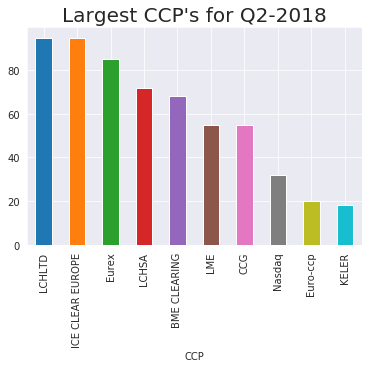

In [189]:
ax = ccp_agr[ccp_agr['quarter'] == 'Q2-2018']['18.1.1.1'].sort_values(ascending=False).head(10).plot.bar()
ax.set_title("Largest CCP's for Q2-2018", fontsize=20)